In [64]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import *
import matplotlib.pyplot as plt

## loading of data

In [74]:
data = pd.read_csv('ExpPHa04_4_CD300E-NOTCH3-CSF1R-PDGFRB.tif_1501_job2985.object_results_CLEANED.csv')
data.head()


(989, 33)

### Renaming of Column names

In [75]:

data.columns = [col.replace(' ', '_') for col in data.columns]
data.columns


Index(['Image_Location', 'Analysis_Region', 'Analysis_Inputs', 'Object_Id',
       'XMin', 'XMax', 'YMin', 'YMax', 'Opal_520_Copies',
       'Opal_520_Area_(µm²)', 'Opal_520_Classification',
       'Opal_520_Cell_Intensity', 'Opal_520_Avg_Intensity', 'Opal_570_Copies',
       'Opal_570_Area_(µm²)', 'Opal_570_Classification',
       'Opal_570_Cell_Intensity', 'Opal_570_Avg_Intensity', 'Opal_620_Copies',
       'Opal_620_Area_(µm²)', 'Opal_620_Classification',
       'Opal_620_Cell_Intensity', 'Opal_620_Avg_Intensity', 'Opal_690_Copies',
       'Opal_690_Area_(µm²)', 'Opal_690_Classification',
       'Opal_690_Cell_Intensity', 'Opal_690_Avg_Intensity', 'Cell_Area_(µm²)',
       'Cytoplasm_Area_(µm²)', 'Nucleus_Area_(µm²)', 'Nucleus_Perimeter_(µm)',
       'Nucleus_Roundness'],
      dtype='object')

## Function to Calculate Centroids of the rectangular bounding boxes

### Note:
### 1st step: calculating center of detected objects by calculating center of bounding boxes

In [76]:
# Use the height and width to calculate the area
def X_centroid(row):
    X = int(row['XMin'] + row['XMax'])/2

    return int(X)

def Y_centroid(row):
    Y = int(row['YMin'] + row['YMax'])/2
    return int(Y)

data['X'] = data.apply(X_centroid, axis=1)
data['Y'] = data.apply(Y_centroid, axis=1)


### Plotting of coordinates

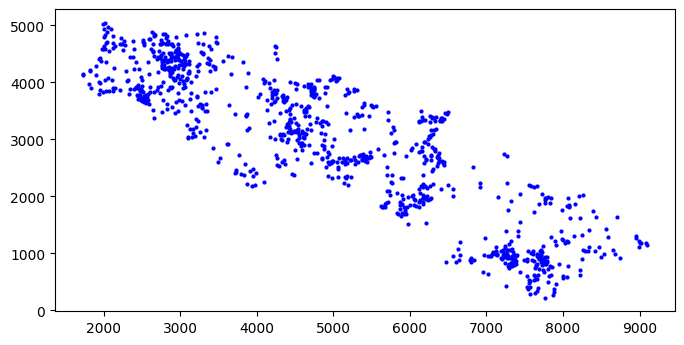

In [77]:
x = np.array(data.X)
y = np.array(data.Y)


w=8
h=4
d=100
plt.figure(figsize=(w, h), dpi=d)
plt.plot(x, y, 'bo', markersize=2)

plt.savefig("/Users/habbasi/Desktop/012120_Halo_outputs/Figures/tissue.png")



### Calculating distances

In [78]:
def classification(row):
    
    if (row['Opal_620_Classification'] == 0) & (row['Opal_690_Classification'] < 2):
        return 'UNCLASSIFIED'
    elif (row['Opal_620_Classification'] == 0) & (row['Opal_690_Classification'] > 1):
        return 'FIBROBLAST'
    elif (row['Opal_620_Classification'] == 1) & (row['Opal_690_Classification'] <= 2):
        return 'UNCLASSIFIED'
    elif (row['Opal_620_Classification'] == 1) & (row['Opal_690_Classification'] > 2):
        return 'FIBROBLAST'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 0):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 0):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 1):
        return 'UNCLASSIFIED'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 2):
        return 'MIXED'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 3):
        return 'MIXED'
    elif (row['Opal_620_Classification'] == 2) & (row['Opal_690_Classification'] == 4):
        return 'FIBROBLAST'
    elif (row['Opal_620_Classification'] == 3) & (row['Opal_690_Classification'] < 2):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 3) & (row['Opal_690_Classification'] < 2):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 3) & (row['Opal_690_Classification'] > 1):
        return 'MIXED'
    elif (row['Opal_620_Classification'] == 4) & (row['Opal_690_Classification'] < 3):
        return 'MYELOID'
    elif (row['Opal_620_Classification'] == 4) & (row['Opal_690_Classification'] > 2):
        return 'MIXED'
    else:
        return 'NA'
    
    

In [79]:


data['Classification'] = data.apply(classification, axis=1)

data.head()

data.shape


(989, 36)

### Plotting

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
  warn("Saving {0} x {1} {2} image.".format(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Desktop/012120_Halo_outputs/Figures/cell_classification.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


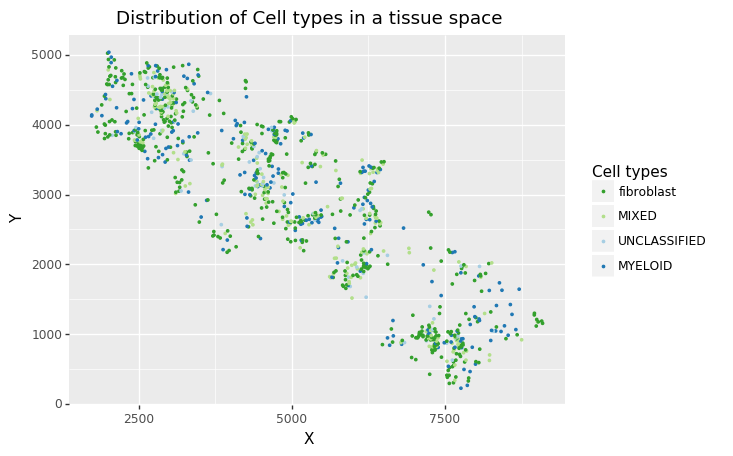

<ggplot: (356443016)>

In [80]:
p = gg.ggplot(data, gg.aes(x='X', y='Y', color= 'Classification')) + \
    gg.geom_point(size = 0.5) + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.ggtitle("Distribution of Cell types in a tissue space") + \
    gg.scale_colour_manual(name= "Cell types", 
                           labels=['fibroblast', 'MIXED', 'UNCLASSIFIED', 'MYELOID'], 
                           values = ["#33a02c", "#b2df8a", "#a6cee3", "#1f78b4"])
   


    

ggsave(filename='cell_classification.png', plot = p, 
       path = '/Users/habbasi/Desktop/012120_Halo_outputs/Figures')
p 



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
  warn("Saving {0} x {1} {2} image.".format(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Desktop/012120_Halo_outputs/Figures/Total_Count_Celltypes.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


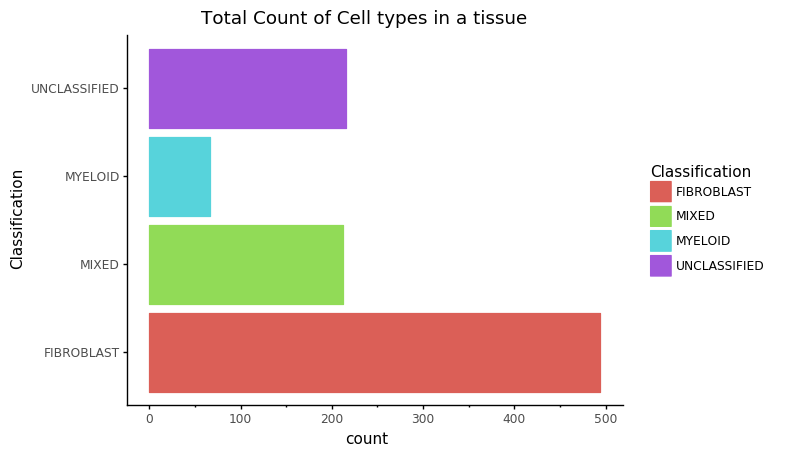

<ggplot: (285567154)>

In [16]:
p = (
    ggplot(data)
    + geom_bar(aes(x='Classification', fill = 'Classification',  color= 'Classification'))
    + coord_flip()
    + theme_classic() +
    gg.ggtitle("Total Count of Cell types in a tissue "))
ggsave(filename='Total_Count_Celltypes.png', plot = p, 
       path = '/Users/habbasi/Desktop/012120_Halo_outputs/Figures')
p

In [117]:
import plotly
import plotly.graph_objs as go
from plotly import tools

colors = ['#d7191c','#a6d96a', '#6a51a3', '#41b6c4']
labels = data['Classification'].unique()
values = data['Classification'].value_counts(dropna=False)

g = go.Pie(labels=labels, values=values, marker=dict(colors=colors
                                                            , line=dict(color='#FFF', width=2)), 
                                                            domain={'x': [0.0, 1], 'y': [0.0, 1]}
                                                            , showlegend=False, name='Count of Cell types', textinfo='label+percent')

layout = go.Layout(height = 600,
                   width = 1000,
                   autosize = False,
                   title = 'Frequency distribution of Cells')
fig = go.Figure(data = g, layout = layout)


#py.iplot(fig, filename='pie_chart')
fig

## Calculating Distances between cells

In [29]:
import math

combinations = []
for i in data['Classification']:
    for j in data['Classification']:
        comb = [i, j]
        combinations.append(comb)


X = list(data.X)       
Y = list(data.Y)

distance = []  
for i in range(0, len(X)):
    for j in range(0, len(X)):
        dist = math.sqrt((X[j] - X[i])**2 + ((Y[j] - Y[i])**2)) * 0.495952562137432
        distance.append(dist)

       
coordinates = []        
for i in zip(data.X, data.Y):
    for j in zip(data.X, data.Y):
        cor = [i, j]
        coordinates.append(cor)
        

dist = pd.DataFrame(distance, columns=['Distance'])
meta = pd.DataFrame(combinations, columns=['idx_1', 'idx_2'])
cord = pd.DataFrame(coordinates, columns=['cord_1', 'cord_2'])

final = pd.concat([cord, meta, dist], axis =1)

final.head()       
        

,cord_1,cord_2,idx_1,idx_2,Distance
0,"(7250, 425)","(7250, 425)",FIBROBLAST,FIBROBLAST,0.000000
1,"(7250, 425)","(7023, 635)",FIBROBLAST,FIBROBLAST,153.368068
2,"(7250, 425)","(6955, 665)",FIBROBLAST,FIBROBLAST,188.608745
3,"(7250, 425)","(7243, 825)",FIBROBLAST,MIXED,198.411400
4,"(7250, 425)","(6596, 841)",FIBROBLAST,UNCLASSIFIED,384.410268


### Sorting distances of FIBROBLAST and MYLEOID cells only

In [31]:
def sorting_rows(row):
    if (row['idx_1'] == 'FIBROBLAST') & (row['idx_2'] == 'MYELOID'):
        return "TRUE"
    else:
        return "FALSE"
    
final['Sorted'] = final.apply(sorting_rows, axis=1)


In [41]:
final.loc[final['Sorted'] == "TRUE"].head()

,cord_1,cord_2,idx_1,idx_2,Distance,Sorted
8,"(7250, 425)","(6839, 879)",FIBROBLAST,MYELOID,303.722661,TRUE
10,"(7250, 425)","(7197, 905)",FIBROBLAST,MYELOID,239.504011,TRUE
50,"(7250, 425)","(7620, 627)",FIBROBLAST,MYELOID,209.068566,TRUE
88,"(7250, 425)","(7526, 870)",FIBROBLAST,MYELOID,259.701618,TRUE
109,"(7250, 425)","(7678, 938)",FIBROBLAST,MYELOID,331.344196,TRUE


In [174]:
f = final.loc[final['Sorted'] == "TRUE"]

f[['X1', 'Y1']] = pd.DataFrame(f['cord_1'].tolist(), index=f.index) 
f[['X2', 'Y2']] = pd.DataFrame(f['cord_2'].tolist(), index=f.index) 

f.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cord_1,cord_2,idx_1,idx_2,Distance,Sorted,X1,Y1,X2,Y2
8,"(7250, 425)","(6839, 879)",FIBROBLAST,MYELOID,303.722661,TRUE,7250,425,6839,879
10,"(7250, 425)","(7197, 905)",FIBROBLAST,MYELOID,239.504011,TRUE,7250,425,7197,905
50,"(7250, 425)","(7620, 627)",FIBROBLAST,MYELOID,209.068566,TRUE,7250,425,7620,627
88,"(7250, 425)","(7526, 870)",FIBROBLAST,MYELOID,259.701618,TRUE,7250,425,7526,870
109,"(7250, 425)","(7678, 938)",FIBROBLAST,MYELOID,331.344196,TRUE,7250,425,7678,938


## Histogram of Distances between Fibroblast and Myleoid

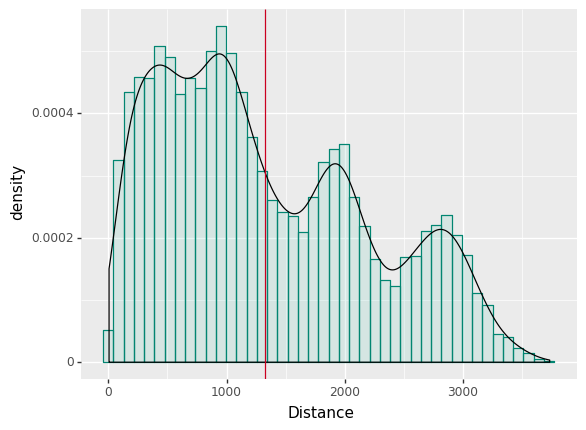

<ggplot: (369180106)>

In [184]:
avg_dist = f['Distance'].mean()



(ggplot(f, aes(x='Distance'))
 + geom_histogram(aes(y='stat(density)'), color= '#018571', fill= '#80cdc1', alpha=.2)
 + geom_density()
 + geom_vline(f, aes(xintercept='avg_dist'), color = '#ca0020')


)


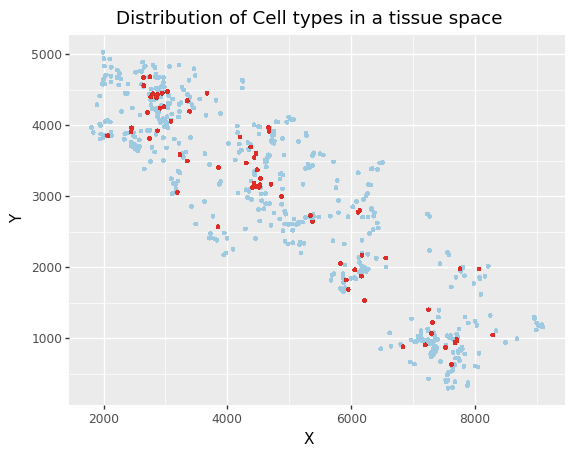

<ggplot: (342597500)>

In [49]:

p = gg.ggplot(f) + \
    gg.geom_point(gg.aes(x='X1', y='Y1'), size = 0.5, color = "#9ecae1") + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.ggtitle("Distribution of Cell types in a tissue space") + \
    gg.geom_point(gg.aes(x='X2', y='Y2'), size = 0.5, color = "#de2d26")
   


    

#ggsave(filename='cell_classification.png', plot = p, 
       #path = '/Users/habbasi/Desktop/012120_Halo_outputs/Figures')
p 



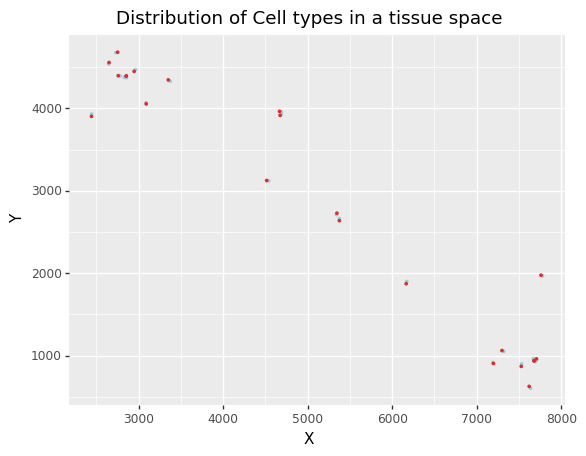

<ggplot: (351872567)>


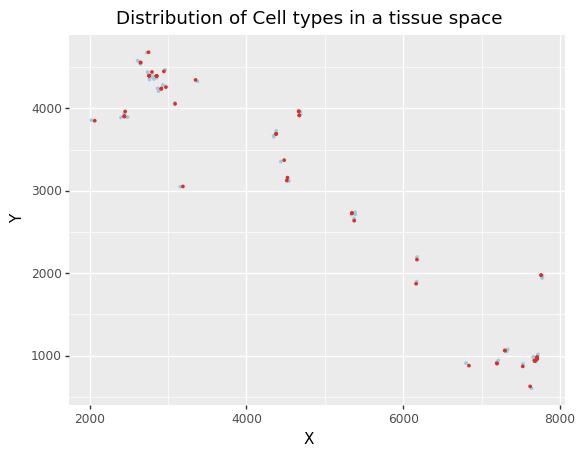

<ggplot: (362929502)>


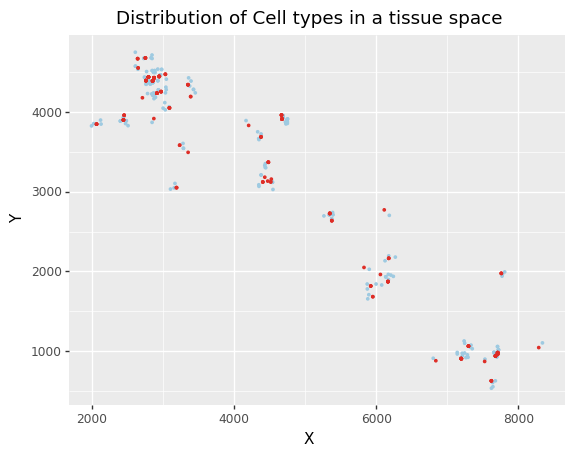

<ggplot: (353261731)>


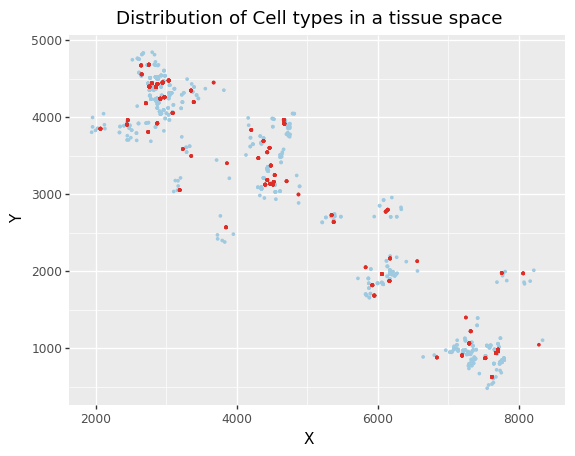

<ggplot: (363016915)>


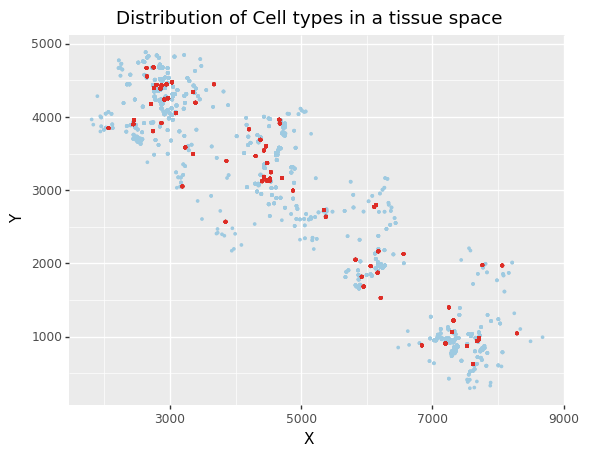

<ggplot: (358223144)>


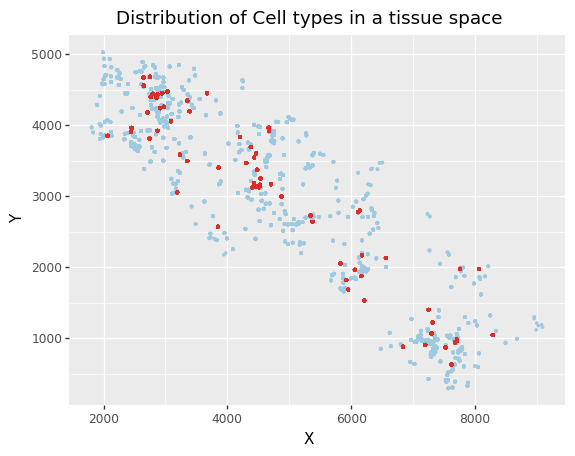

<ggplot: (358223270)>


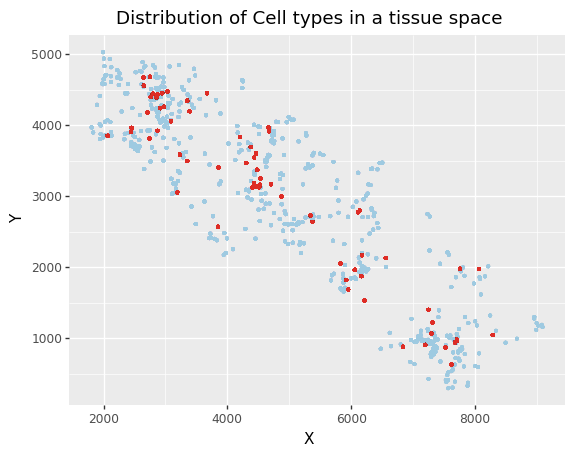

<ggplot: (362122548)>


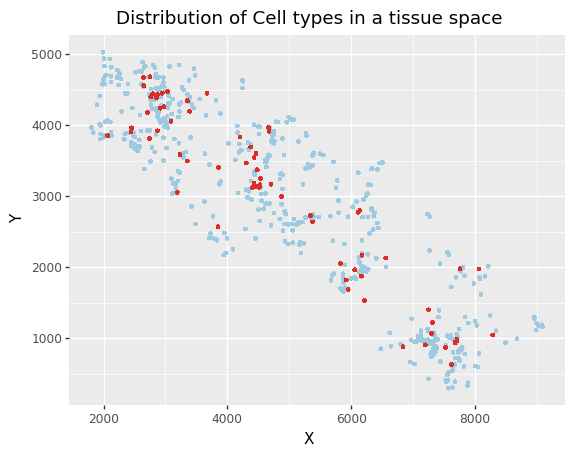

<ggplot: (366813362)>


In [153]:
distlist = [15, 25, 50, 100, 250, 500, 1000, 2000]

for i, p in enumerate(distlist):
    
    f2 = f.loc[final['Distance'] <= p]
    g = gg.ggplot(f2) + \
    gg.geom_point(gg.aes(x='X1', y='Y1'), size = 0.5, color = "#9ecae1") + \
    gg.xlab("X") + \
    gg.ylab("Y") + \
    gg.labs(title=p) + \
    gg.ggtitle("Distribution of Cell types in a tissue space") + \
    gg.geom_point(gg.aes(x='X2', y='Y2'), size = 0.5, color = "#de2d26")
    print(g)
    
   


    

# ggsave(filename='cell_classification.png', plot = p, 
#        path = '/Users/habbasi/Desktop/012120_Halo_outputs/Figures')


# g
